In [1]:
import os

# Path to the desired directory
desired_directory = r'c:\Users\Dimitrideboer\OneDrive - Emixa\Documents\XRAYxEmixaHackathon'

# Set the current working directory to the desired directory
os.chdir(desired_directory)

# Print the current working directory to confirm
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\Dimitrideboer\OneDrive - Emixa\Documents\XRAYxEmixaHackathon


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('data/PopularitySystem_numbids.csv')

In [8]:
df.columns

Index(['batterycapacity', 'bodytype', 'bpmvalue', 'cardistancevalue',
       'cartypename', 'catalogincludingvalue', 'catalogvalue', 'costsvalue',
       'duedateapk', 'enginehorsepower', 'equipmentvalue', 'fueltype',
       'hascosts', 'hascostsmanual', 'hasdamage', 'isimportcar', 'minbid',
       'modelnameshort', 'remainingbpmvalue', 'taxliabilitypercentage',
       'transmissiontype', 'vatmargin', 'vehicletype', 'xrayvalue',
       'total_companies_bidded', 'total_bids'],
      dtype='object')

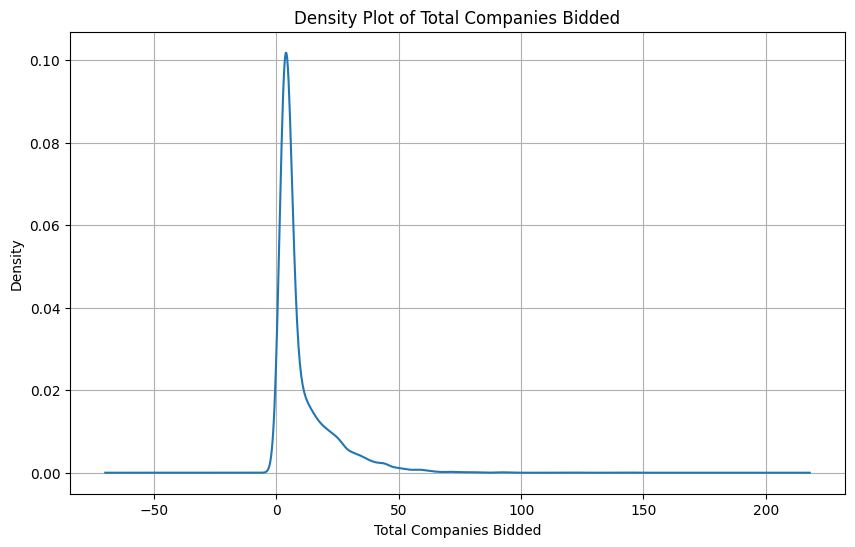

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/PopularitySystem.csv')

# Plot the density plot
plt.figure(figsize=(10, 6))
df['total_bids'].plot(kind='density')
plt.title('Density Plot of Total Companies Bidded')
plt.xlabel('Total Companies Bidded')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('data/PopularitySystem.csv')

# Identify the columns
target_columns = ['total_companies_bidded']
feature_columns = df.columns.difference(target_columns).drop('total_bids')

# Separate features and target variables
X = df[feature_columns]
y = df[target_columns]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# # Preprocessing for numerical data
# numerical_transformer = StandardScaler()

# # Preprocessing for categorical data
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# # Bundle preprocessing for numerical and categorical data
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='most frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define preprocessing for boolean features
boolean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
    # No need for additional transformation; booleans are already binary
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)# + boolean_cols)
    ]
)

x = preprocessor.fit_transform(X)


# Define the model
model = LGBMRegressor(num_leaves=31, learning_rate=0.1, n_estimators=100)

# Create the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', model)])

# # Hyperparameter tuning
# param_grid = {
#     'regressor__estimator__num_leaves': [31],
#     'regressor__estimator__learning_rate': [0.1],
#     'regressor__estimator__n_estimators': [100]
# }

# grid_search = GridSearchCV(clf, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
# grid_search.fit(X_train, y_train)

# # Best model
# best_model = grid_search.best_estimator_

# Train the best model on the training set
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate overall metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE

print("Overall Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2571
[LightGBM] [Info] Number of data points in the train set: 5820, number of used features: 213
[LightGBM] [Info] Start training from score 2.169931
Overall Metrics:
Mean Squared Error: 1.0808254360928276
Mean Absolute Error: 0.7960561061347275
R2 Score: 0.13332638841649025
Root Mean Squared Error: 1.0396275468131977


c:\Users\DimitrideBoer\OneDrive - Emixa\Documents\XRAYxEmixaHackathon\venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
X_train[:1]

,batterycapacity,bodytype,bpmvalue,cardistancevalue,cartypename,catalogincludingvalue,catalogvalue,costsvalue,duedateapk,enginehorsepower,...,hasdamage,isimportcar,minbid,modelnameshort,remainingbpmvalue,taxliabilitypercentage,transmissiontype,vatmargin,vehicletype,xrayvalue
3057,33 kWh,Hatchb. 3,0.0,35818.0,Basic 33 kWh,33767.0,33767.0,0.0,2024-03-20 00:00:00.000,184.0,...,True,False,11937.0,Mini Electric,0.0,8 %,Automatic,BTW,Personenauto,14044.0


In [26]:
sample_input_converted

{'bpmvalue': 3057    0.0
 Name: bpmvalue, dtype: float32,
 'cardistancevalue': 3057    35818.0
 Name: cardistancevalue, dtype: float32,
 'catalogincludingvalue': 3057    33767.0
 Name: catalogincludingvalue, dtype: float32,
 'catalogvalue': 3057    33767.0
 Name: catalogvalue, dtype: float32,
 'costsvalue': 3057    0.0
 Name: costsvalue, dtype: float32,
 'enginehorsepower': 3057    184.0
 Name: enginehorsepower, dtype: float32,
 'equipmentvalue': 3057    0.0
 Name: equipmentvalue, dtype: float32,
 'minbid': 3057    11937.0
 Name: minbid, dtype: float32,
 'remainingbpmvalue': 3057    0.0
 Name: remainingbpmvalue, dtype: float32,
 'xrayvalue': 3057    14044.0
 Name: xrayvalue, dtype: float32,
 'batterycapacity': 3057    33 kWh
 Name: batterycapacity, dtype: object,
 'bodytype': 3057    Hatchb. 3
 Name: bodytype, dtype: object,
 'cartypename': 3057    Basic 33 kWh
 Name: cartypename, dtype: object,
 'duedateapk': 3057    2024-03-20 00:00:00.000
 Name: duedateapk, dtype: object,
 'fueltype

In [27]:
# Prepare a sample input for ONNX conversion
sample_input = X_train[:1]

# Convert the sample input to match the initial types
sample_input_converted = {
    'bpmvalue': sample_input['bpmvalue'].astype(np.float32),
    'cardistancevalue': sample_input['cardistancevalue'].astype(np.float32),
    'catalogincludingvalue': sample_input['catalogincludingvalue'].astype(np.float32),
    'catalogvalue': sample_input['catalogvalue'].astype(np.float32),
    'costsvalue': sample_input['costsvalue'].astype(np.float32),
    'enginehorsepower': sample_input['enginehorsepower'].astype(np.float32),
    'equipmentvalue': sample_input['equipmentvalue'].astype(np.float32),
    'minbid': sample_input['minbid'].astype(np.float32),
    'remainingbpmvalue': sample_input['remainingbpmvalue'].astype(np.float32),
    'xrayvalue': sample_input['xrayvalue'].astype(np.float32),
    'batterycapacity': sample_input['batterycapacity'].astype(str),
    'bodytype': sample_input['bodytype'].astype(str),
    'cartypename': sample_input['cartypename'].astype(str),
    'duedateapk': sample_input['duedateapk'].astype(str),
    'fueltype': sample_input['fueltype'].astype(str),
    'hascosts': sample_input['hascosts'].astype(str),
    'hascostsmanual': sample_input['hascostsmanual'].astype(str),
    'hasdamage': sample_input['hasdamage'].astype(str),
    'isimportcar': sample_input['isimportcar'].astype(str),
    'modelnameshort': sample_input['modelnameshort'].astype(str),
    'taxliabilitypercentage': sample_input['taxliabilitypercentage'].astype(str),
    'transmissiontype': sample_input['transmissiontype'].astype(str),
    'vatmargin': sample_input['vatmargin'].astype(str),
    'vehicletype': sample_input['vehicletype'].astype(str)
}

onnx_model = to_onnx(
    clf,
    np.array(sample_input_converted),  # Use a sample of the training data for conversion
    target_opset={"": 14, "ai.onnx.ml": 2}
)

# Save the ONNX model to a file
with open("pipeline_lightgbm.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [19]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType, StringTensorType
from skl2onnx import to_onnx

# Convert the model to ONNX
initial_type = [('float_input', FloatTensorType([None, len(feature_columns)]))]
initial_type = [('bpmvalue', FloatTensorType([1, 1])),
                ('cardistancevalue', FloatTensorType([1, 1])),
                ('catalogincludingvalue', FloatTensorType([1, 1])),
                ('catalogvalue', FloatTensorType([1, 1])),
                ('costsvalue', FloatTensorType([1, 1])),
                ('enginehorsepower', FloatTensorType([1, 1])),
                ('equipmentvalue', FloatTensorType([1, 1])),
                ('minbid', FloatTensorType([1, 1])),
                ('remainingbpmvalue', FloatTensorType([1, 1])),
                ('xrayvalue', FloatTensorType([1, 1])),
                ('batterycapacity', StringTensorType([1, 1])),
                ('bodytype', StringTensorType([1, 1])),
                ('cartypename', StringTensorType([1, 1])),
                ('duedateapk', StringTensorType([1, 1])),
                ('fueltype', StringTensorType([1, 1])),
                ('duedateapk', StringTensorType([1, 1])),
                ('hascosts', StringTensorType([1, 1])),
                ('hascostsmanual', StringTensorType([1, 1])),
                ('hasdamage', StringTensorType([1, 1])),
                ('isimportcar', StringTensorType([1, 1])),
                ('modelnameshort', StringTensorType([1, 1])),
                ('taxliabilitypercentage', StringTensorType([1, 1])),
                ('transmissiontype', StringTensorType([1, 1])),
                ('vatmargin', StringTensorType([1, 1])),
                ('vehicletype', StringTensorType([1, 1])),
                ('xrayvalue', StringTensorType([1, 1]))
                ]
# Convert the model to ONNX
onnx_model = convert_sklearn(
    clf,
    initial_types=initial_type,
    target_opset={"": 12, "ai.onnx.ml": 2},
)
#onnx_model = convert_sklearn(clf, initial_types=initial_type)#, target_opset=12)

# Save the ONNX model to a file
with open("best_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

MissingShapeCalculator: Unable to find a shape calculator for type '<class 'lightgbm.sklearn.LGBMRegressor'>'.
It usually means the pipeline being converted contains a
transformer or a predictor with no corresponding converter
implemented in sklearn-onnx. If the converted is implemented
in another library, you need to register
the converted so that it can be used by sklearn-onnx (function
update_registered_converter). If the model is not yet covered
by sklearn-onnx, you may raise an issue to
https://github.com/onnx/sklearn-onnx/issues
to get the converter implemented or even contribute to the
project. If the model is a custom model, a new converter must
be implemented. Examples can be found in the gallery.


In [28]:
sample_input = X_train[:1]

# Convert the sample input to a NumPy array
sample_input_np = np.array([list(sample_input[col]) for col in sample_input.columns])

In [29]:
sample_input_np

array([['33 kWh'],
       ['Hatchb. 3'],
       ['0.0'],
       ['35818.0'],
       ['Basic 33 kWh'],
       ['33767.0'],
       ['33767.0'],
       ['0.0'],
       ['2024-03-20 00:00:00.000'],
       ['184.0'],
       ['0.0'],
       ['Elektrisch'],
       ['True'],
       ['False'],
       ['True'],
       ['False'],
       ['11937.0'],
       ['Mini Electric'],
       ['0.0'],
       ['8 %'],
       ['Automatic'],
       ['BTW'],
       ['Personenauto'],
       ['14044.0']], dtype='<U32')

In [5]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'PopularityModel.pkl')

# To load the model from a file
# loaded_model = joblib.load('best_model.pkl')

['PopularityModel.pkl']

In [31]:
pip install onnxruntime

   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
    --------------------------------------- 0.1/5.6 MB 3.2 MB/s eta 0:00:02
   ---- ----------------------------------- 0.6/5.6 MB 9.6 MB/s eta 0:00:01
   ------------- -------------------------- 1.8/5.6 MB 16.6 MB/s eta 0:00:01
   ------------------- -------------------- 2.7/5.6 MB 16.9 MB/s eta 0:00:01
   ------------------------- -------------- 3.6/5.6 MB 17.5 MB/s eta 0:00:01
   ---------------------------------- ----- 4.8/5.6 MB 19.3 MB/s eta 0:00:01
   ---------------------------------------  5.6/5.6 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 5.6/5.6 MB 17.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.0 kB ? eta -:--:--
   ---------------------------------------- 46.0/46.0 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
   ------ --------------------------------- 1.0/5.7 MB 21.1 MB/s eta 0:00:01
   --------------- ----

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from skl2onnx import to_onnx, update_registered_converter
from skl2onnx.common.data_types import FloatTensorType, StringTensorType
from skl2onnx.common.shape_calculator import calculate_linear_regressor_output_shapes
from onnxmltools.convert.lightgbm.operator_converters.LightGbm import convert_lightgbm
import packaging.version as pv
import onnxruntime as rt
import warnings

# Function to convert LightGBM model
def skl2onnx_convert_lightgbm(scope, operator, container):
    options = scope.get_options(operator.raw_operator)
    if "split" in options:
        if pv.Version(onnxmltools.__version__) < pv.Version("1.9.2"):
            warnings.warn(
                "Option split was released in version 1.9.2 but %s is "
                "installed. It will be ignored." % onnxmltools.__version__
            )
        operator.split = options["split"]
    else:
        operator.split = None
    convert_lightgbm(scope, operator, container)

# Register the converter for LGBMRegressor
update_registered_converter(
    LGBMRegressor,
    "LightGbmLGBMRegressor",
    calculate_linear_regressor_output_shapes,
    skl2onnx_convert_lightgbm,
    options={"split": None},
)

# Load the dataset
df = pd.read_csv('data/PopularitySystem.csv')

# Identify the columns
target_columns = ['total_companies_bidded']
feature_columns = df.columns.difference(target_columns).drop('total_bids')

# Separate features and target variables
X = df[feature_columns]
y = df[target_columns]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = LGBMRegressor()

# Create the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', model)])

# Hyperparameter tuning
param_grid = {
    'regressor__num_leaves': [31],
    'regressor__learning_rate': [0.1],
    'regressor__n_estimators': [100]
}

grid_search = GridSearchCV(clf, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate overall metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE

print("Overall Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)

# Prepare a sample input for ONNX conversion
# Prepare a sample input for ONNX conversion
sample_input = X_train[:1]

# Convert the sample input to match the initial types
sample_input_converted = {
    'bpmvalue': sample_input['bpmvalue'].astype(np.float32),
    'cardistancevalue': sample_input['cardistancevalue'].astype(np.float32),
    'catalogincludingvalue': sample_input['catalogincludingvalue'].astype(np.float32),
    'catalogvalue': sample_input['catalogvalue'].astype(np.float32),
    'costsvalue': sample_input['costsvalue'].astype(np.float32),
    'enginehorsepower': sample_input['enginehorsepower'].astype(np.float32),
    'equipmentvalue': sample_input['equipmentvalue'].astype(np.float32),
    'minbid': sample_input['minbid'].astype(np.float32),
    'remainingbpmvalue': sample_input['remainingbpmvalue'].astype(np.float32),
    'xrayvalue': sample_input['xrayvalue'].astype(np.float32),
    'batterycapacity': sample_input['batterycapacity'].astype(str),
    'bodytype': sample_input['bodytype'].astype(str),
    'cartypename': sample_input['cartypename'].astype(str),
    'duedateapk': sample_input['duedateapk'].astype(str),
    'fueltype': sample_input['fueltype'].astype(str),
    'hascosts': sample_input['hascosts'].astype(str),
    'hascostsmanual': sample_input['hascostsmanual'].astype(str),
    'hasdamage': sample_input['hasdamage'].astype(str),
    'isimportcar': sample_input['isimportcar'].astype(str),
    'modelnameshort': sample_input['modelnameshort'].astype(str),
    'taxliabilitypercentage': sample_input['taxliabilitypercentage'].astype(str),
    'transmissiontype': sample_input['transmissiontype'].astype(str),
    'vatmargin': sample_input['vatmargin'].astype(str),
    'vehicletype': sample_input['vehicletype'].astype(str)
}

# Convert the entire pipeline to ONNX
onnx_model = to_onnx(
    best_model,
    X_train[:1],
    initial_types=initial_type,
    target_opset={"": 15, "ai.onnx.ml": 2}
)

# Save the ONNX model to a file
with open("popularityModel3.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Model has been converted to ONNX and saved as 'pipeline_lightgbm.onnx'")


Fitting 2 folds for each of 1 candidates, totalling 2 fits


c:\Users\DimitrideBoer\OneDrive - Emixa\Documents\XRAYxEmixaHackathon\venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2571
[LightGBM] [Info] Number of data points in the train set: 5820, number of used features: 213
[LightGBM] [Info] Start training from score 2.169931
Overall Metrics:
Mean Squared Error: 1.0808254360928276
Mean Absolute Error: 0.7960561061347275
R2 Score: 0.13332638841649025
Root Mean Squared Error: 1.0396275468131977
Model has been converted to ONNX and saved as 'pipeline_lightgbm.onnx'


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from skl2onnx import to_onnx, update_registered_converter
from skl2onnx.common.data_types import FloatTensorType, StringTensorType
from skl2onnx.common.shape_calculator import calculate_linear_regressor_output_shapes
from onnxmltools.convert.lightgbm.operator_converters.LightGbm import convert_lightgbm
import packaging.version as pv
import onnxruntime as rt
import warnings

# Function to convert LightGBM model
def skl2onnx_convert_lightgbm(scope, operator, container):
    options = scope.get_options(operator.raw_operator)
    if "split" in options:
        if pv.Version(onnxmltools.__version__) < pv.Version("1.9.2"):
            warnings.warn(
                "Option split was released in version 1.9.2 but %s is "
                "installed. It will be ignored." % onnxmltools.__version__
            )
        operator.split = options["split"]
    else:
        operator.split = None
    convert_lightgbm(scope, operator, container)

# Register the converter for LGBMRegressor
update_registered_converter(
    LGBMRegressor,
    "LightGbmLGBMRegressor",
    calculate_linear_regressor_output_shapes,
    skl2onnx_convert_lightgbm,
    options={"split": None},
)

# Load the dataset
df = pd.read_csv('data/PopularitySystem.csv')

# Identify the columns
target_columns = ['total_companies_bidded']
feature_columns = df.columns.difference(target_columns).drop('total_bids')

# Separate features and target variables
X = df[feature_columns]
y = df[target_columns]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = LGBMRegressor()

# Create the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', model)])

# Hyperparameter tuning
param_grid = {
    'regressor__num_leaves': [31],
    'regressor__learning_rate': [0.1],
    'regressor__n_estimators': [100]
}

grid_search = GridSearchCV(clf, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate overall metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE

print("Overall Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)

# Prepare a sample input for ONNX conversion
# Prepare a sample input for ONNX conversion
sample_input = X_train[:1]

# Convert the sample input to match the initial types
sample_input_converted = {
    'bpmvalue': sample_input['bpmvalue'].astype(np.float32),
    'cardistancevalue': sample_input['cardistancevalue'].astype(np.float32),
    'catalogincludingvalue': sample_input['catalogincludingvalue'].astype(np.float32),
    'catalogvalue': sample_input['catalogvalue'].astype(np.float32),
    'costsvalue': sample_input['costsvalue'].astype(np.float32),
    'enginehorsepower': sample_input['enginehorsepower'].astype(np.float32),
    'equipmentvalue': sample_input['equipmentvalue'].astype(np.float32),
    'minbid': sample_input['minbid'].astype(np.float32),
    'remainingbpmvalue': sample_input['remainingbpmvalue'].astype(np.float32),
    'xrayvalue': sample_input['xrayvalue'].astype(np.float32),
    'batterycapacity': sample_input['batterycapacity'].astype(str),
    'bodytype': sample_input['bodytype'].astype(str),
    'cartypename': sample_input['cartypename'].astype(str),
    'duedateapk': sample_input['duedateapk'].astype(str),
    'fueltype': sample_input['fueltype'].astype(str),
    'hascosts': sample_input['hascosts'].astype(str),
    'hascostsmanual': sample_input['hascostsmanual'].astype(str),
    'hasdamage': sample_input['hasdamage'].astype(str),
    'isimportcar': sample_input['isimportcar'].astype(str),
    'modelnameshort': sample_input['modelnameshort'].astype(str),
    'taxliabilitypercentage': sample_input['taxliabilitypercentage'].astype(str),
    'transmissiontype': sample_input['transmissiontype'].astype(str),
    'vatmargin': sample_input['vatmargin'].astype(str),
    'vehicletype': sample_input['vehicletype'].astype(str)
}

# Convert the entire pipeline to ONNX
onnx_model = to_onnx(
    best_model,
    X_train[:1],
    target_opset={"": 15, "ai.onnx.ml": 2}
)

# Save the ONNX model to a file
with open("popularityModel2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Model has been converted to ONNX and saved as 'pipeline_lightgbm.onnx'")


Fitting 2 folds for each of 1 candidates, totalling 2 fits


c:\Users\DimitrideBoer\OneDrive - Emixa\Documents\XRAYxEmixaHackathon\venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2571
[LightGBM] [Info] Number of data points in the train set: 5820, number of used features: 213
[LightGBM] [Info] Start training from score 2.169931
Overall Metrics:
Mean Squared Error: 1.0808254360928276
Mean Absolute Error: 0.7960561061347275
R2 Score: 0.13332638841649025
Root Mean Squared Error: 1.0396275468131977
Model has been converted to ONNX and saved as 'pipeline_lightgbm.onnx'
